In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2)
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\getlimits.py:174: RuntimeWarning: divide by zero encountered in exp2
  eps=exp2(ld(-112)),
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\getlimits.py:53: RuntimeWarning: divide by zero encountered in log10
  self.precision = int(-log10(self.eps))
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\getlimits.py:54: RuntimeWarning: divide by zero encountered in power
  self.resolution = float_to_float(float_conv(10) ** (-self.precision))
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\getlimits.py:186: RuntimeWarning: divide by zero encountered in exp2
  epsneg_f80 = exp2(ld(-64))
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\getlimits.py:187: RuntimeWarning: divide by zero encountered in exp2
  tiny_f80 = exp2(ld(-16382))
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\getlimits.py:201: RuntimeWarning: divide by zero encountered in exp2
  eps=exp2(ld(-63)),
C:\Users\ruiwa\anaconda3\lib\site-packages\nump

In [2]:
train = pd.read_excel('C:\\Users\\ruiwa\\Documents\\课件\\NLP\\nlp group\\Git\\dataset\\train_labeled.xlsx')

C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\io\parsers.py:1763: RuntimeWarning: divide by zero encountered in equal
  result = lib.maybe_convert_numeric(values, na_values, False)
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:262: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\_methods.py:38: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\internals\managers.py:226: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\_methods.py:45: RuntimeWarning: divide by zero encountered in reduce
  return um

In [29]:
df = train.copy()
df.head()

C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\internals\managers.py:226: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\internals\managers.py:226: RuntimeWarning: invalid value encountered in equal
  if (new_blknos == -1).any():
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\_methods.py:45: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:379: RuntimeWarning: divide by zero encountered in invert
  return ~res
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:379: RuntimeWarning: invalid value encountered in invert
  return ~res
C:\Users\ruiwa\anaconda3\lib\site-package

,ID,Time,User,Content,Pic,Video,Sentiment
0,4456070000000000,01月01日 23:50,存曦1988,写在年末冬初孩子流感的第五天，我们仍然没有忘记热情拥抱这2020年的第一天。带着一丝迷信，早...,['https://ww2.sinaimg.cn/orj360/005VnA1zly1gah...,[],0
2,4456050000000000,01月01日 22:39,小王爷学辩论o_O,邱晨这就是我爹，爹，发烧快好，毕竟美好的假期拿来养病不太好，假期还是要好好享受快乐，爹，新...,['https://ww2.sinaimg.cn/thumb150/006ymYXKgy1g...,[],1
3,4456060000000000,01月01日 23:08,芩鎟,新年的第一天感冒又发烧的也太衰了但是我要想着明天一定会好的?,['https://ww2.sinaimg.cn/orj360/005FL9LZgy1gah...,[],1
4,4455980000000000,01月01日 17:42,changlwj,问：我们意念里有坏的想法了，天神就会给记下来，那如果有好的想法也会被记下来吗？答：那当然了。...,[],[],1
5,4455960000000000,01月01日 16:28,风萧水寒2020,发高烧反反复复，眼睛都快睁不开了。今天室友带我去看，还在发烧中建议我输液，我拒绝了。给我打针...,['https://ww1.sinaimg.cn/thumb150/e7cddf99gy1g...,[],-1


In [4]:
train = train.rename(columns={'微博id': 'ID', '微博发布时间': 'Time', '发布人账号':'User','微博中文内容':'Content',
                        '微博图片':'Pic', '微博视频':'Video','情感倾向':'Sentiment'})

In [5]:
train.head(10)

C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\_methods.py:45: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:379: RuntimeWarning: divide by zero encountered in invert
  return ~res
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\io\formats\format.py:1252: RuntimeWarning: divide by zero encountered in bitwise_and
  is_float_type = lib.map_infer(vals, is_float) & notna(vals)
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\_methods.py:30: RuntimeWarning: divide by zero encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\io\formats\format.py:878: RuntimeWarning: divide by zero encountered in long_scalars
  lwidth -= np.array([self.adj.len(x) for x in idx]).max() + adjoin_width
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\io\formats\format.py:1925: RuntimeWarn

,ID,Time,User,Content,Pic,Video,Sentiment
0,4456070000000000,01月01日 23:50,存曦1988,写在年末冬初孩子流感的第五天，我们仍然没有忘记热情拥抱这2020年的第一天。带着一丝迷信，早...,['https://ww2.sinaimg.cn/orj360/005VnA1zly1gah...,[],0
1,4456070000000000,01月01日 23:58,LunaKrys,开年大模型…累到以为自己发烧了腰疼膝盖疼腿疼胳膊疼脖子疼#Luna的Krystallife#?,[],[],-1
2,4456050000000000,01月01日 22:39,小王爷学辩论o_O,邱晨这就是我爹，爹，发烧快好，毕竟美好的假期拿来养病不太好，假期还是要好好享受快乐，爹，新...,['https://ww2.sinaimg.cn/thumb150/006ymYXKgy1g...,[],1
3,4456060000000000,01月01日 23:08,芩鎟,新年的第一天感冒又发烧的也太衰了但是我要想着明天一定会好的?,['https://ww2.sinaimg.cn/orj360/005FL9LZgy1gah...,[],1
4,4455980000000000,01月01日 17:42,changlwj,问：我们意念里有坏的想法了，天神就会给记下来，那如果有好的想法也会被记下来吗？答：那当然了。...,[],[],1
5,4455960000000000,01月01日 16:28,风萧水寒2020,发高烧反反复复，眼睛都快睁不开了。今天室友带我去看，还在发烧中建议我输液，我拒绝了。给我打针...,['https://ww1.sinaimg.cn/thumb150/e7cddf99gy1g...,[],-1
6,4456040000000000,01月01日 21:59,无艳迎春,明天考试今天发烧跨年给我跨坏了？？2兰州·兰州交通大学?,[],[],-1
7,4456070000000000,01月01日 23:53,得意学堂小枇杷,#元旦快乐##枇杷手法小结#每个娃都是有故事的娃。每个大人也是有故事的大人。小枇杷有茶有手法...,['https://ww4.sinaimg.cn/orj360/005OdthOly1gah...,[],0
8,4456060000000000,01月01日 23:00,晓了白了兔,我真的服了xkh昨天vv去和她说自己不舒服，描述了症状她说啊你这不是感冒没有发烧没事的晚上一...,[],[],-1
9,4456060000000000,01月01日 23:19,172的大漂亮,新年第一天，为自己鼓掌??????发烧了也要来看线下演出！因为热爱，所以才会克服困难线上演出...,['https://ww3.sinaimg.cn/thumb150/006aUFAcly1g...,[],1


C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:262: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\series.py:2959: RuntimeWarning: divide by zero encountered in invert
  good = ~bad
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\_methods.py:38: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\numeric.py:2327: RuntimeWarning: divide by zero encountered in equal
  return bool(asarray(a1 == a2).all())
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1320: RuntimeWarning: divide by zero encountered in subtract
  self.ax_pos = self.tick_pos - self.tickoff

C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\axis.py:1337: RuntimeWarning: divide by zero encountered in double_scalars
  tol = (hi - lo) * 1e-5
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1416: RuntimeWarning: divide by zero encountered in double_scalars
  s_edge = self.ax_pos[0] - 0.25 + self.lim_offset
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1417: RuntimeWarning: divide by zero encountered in double_scalars
  e_edge = self.ax_pos[-1] + 0.25 + self.bar_width + self.lim_offset


Text(0.5, 1.0, 'sentiment(target)')

C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\axis.py:2490: RuntimeWarning: divide by zero encountered in double_scalars
  length = ((ends[1][1] - ends[0][1]) / self.axes.figure.dpi) * 72
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\axis.py:2495: RuntimeWarning: divide by zero encountered in double_scalars
  return int(np.floor(length / size))
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\axis.py:2495: RuntimeWarning: divide by zero encountered in floor
  return int(np.floor(length / size))
C:\Users\ruiwa\anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:195: RuntimeWarning: divide by zero encountered in greater
  return rgbaArr[:,:3].dot((.299, .587, .114)) > .5
C:\Users\ruiwa\anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:184: RuntimeWarning: divide by zero encountered in equal
  if ticksLight.size and (ticksLight == ticksLight[0]).all():
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\transforms.py:411: RuntimeWarning: divide

C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\figure.py:2382: RuntimeWarning: divide by zero encountered in isfinite
  if (np.isfinite(b.width) and np.isfinite(b.height)
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\transforms.py:669: RuntimeWarning: divide by zero encountered in add
  return Bbox(points + [[-p, -p], [p, p]])
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\tight_bbox.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  w1, h1 = fig.bbox.width * dpi_scale, fig.bbox.height * dpi_scale
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\tight_bbox.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  fig.patch.set_bounds(x0 / w1, y0 / h1,
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\tight_bbox.py:69: RuntimeWarning: divide by zero encountered in double_scalars
  fig.bbox.width / w1, fig.bbox.height / h1)
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\patches.py:742: RuntimeWarning: divide by zero enc

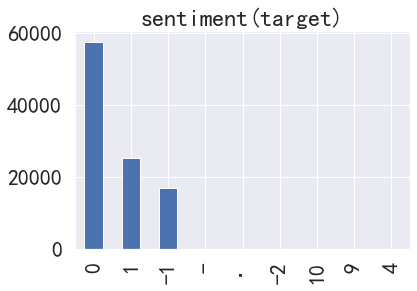

In [6]:
train['Sentiment'].value_counts().plot.bar()
plt.title('sentiment(target)')

In [32]:
train = train.drop_duplicates(['ID'])

C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\indexes\base.py:2488: RuntimeWarning: divide by zero encountered in not_equal
  indexer = indexer.take((indexer != -1).nonzero()[0])
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\indexes\base.py:2488: RuntimeWarning: invalid value encountered in not_equal
  indexer = indexer.take((indexer != -1).nonzero()[0])
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:565: RuntimeWarning: divide by zero encountered in not_equal
  mask &= (ar1 != a)
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:565: RuntimeWarning: invalid value encountered in not_equal
  mask &= (ar1 != a)
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:565: RuntimeWarning: divide by zero encountered in bitwise_and
  mask &= (ar1 != a)
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:565: RuntimeWarning: invalid value encountered in bitwise_and
  mask &= (ar1 != a)
C:\Users\ruiwa\anaconda

In [33]:
train_df = train[train['Sentiment'].isin(['0','1','-1'])]

In [24]:
train_df['Sentiment'].count()

0

In [39]:
train_df['Time'].head()

Series([], Name: Time, dtype: object)

In [34]:
train_df['date_parsed'] = pd.to_datetime(train_df['Time'],format="%m/%d/%y")
train_df['month'] =  train_df['date_parsed'].dt.month
train_df['day'] =  train_df['date_parsed'].dt.day

C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\arrays\datetimelike.py:831: RuntimeWarning: divide by zero encountered in equal
  return self.asi8 == iNaT
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\arrays\datetimelike.py:831: RuntimeWarning: invalid value encountered in equal
  return self.asi8 == iNaT


In [44]:
train_df['dayfromzero']  = (train_df['month']-1)*31 +  train_df['day']

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.kdeplot(train_df.loc[train_df['Sentiment'] == '0', 'dayfromzero'], ax=ax[0], label='sent(0)')
sns.kdeplot(train_df.loc[train_df['Sentiment'] == '1', 'dayfromzero'], ax=ax[0], label='sent(1)')
sns.kdeplot(train_df.loc[train_df['Sentiment'] == '-1', 'dayfromzero'], ax=ax[0], label='sent(-1)')
train_df.loc[train_df['Sentiment'] == '0', 'dayfromzero'].hist(ax=ax[1])
train_df.loc[train_df['Sentiment'] == '1', 'dayfromzero'].hist(ax=ax[1])
train_df.loc[train_df['Sentiment'] == '-1', 'dayfromzero'].hist(ax=ax[1])
ax[1].legend(['sent(0)', 'sent(1)','sent(-1)'])
plt.show()


ValueError: cannot convert float NaN to integer

<Figure size 1152x576 with 2 Axes>

In [12]:
train_df['date'] = train_df['date_parsed'].dt.date
date_influence = train_df.groupby(['date','Sentiment'],as_index=False).count()

C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\indexes\base.py:5015: RuntimeWarning: divide by zero encountered in equal
  mask = indexer == -1
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\lib\function_base.py:4400: RuntimeWarning: divide by zero encountered in less
  inside_bounds = (obj < N) & (obj >= -N)
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\lib\function_base.py:4400: RuntimeWarning: divide by zero encountered in greater_equal
  inside_bounds = (obj < N) & (obj >= -N)
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\lib\function_base.py:4400: RuntimeWarning: divide by zero encountered in bitwise_and
  inside_bounds = (obj < N) & (obj >= -N)
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\lib\function_base.py:4408: RuntimeWarning: divide by zero encountered in greater_equal
  positive_indices = obj >= 0
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\sorting.py:89: RuntimeWarning: divide by zero encountered in multiply
  out += labels[i] * stride
C:\Use

C:\Users\ruiwa\anaconda3\lib\site-packages\seaborn\relational.py:704: RuntimeWarning: divide by zero encountered in multiply
  np.r_[.5, 2] * mpl.rcParams["lines.linewidth"]
C:\Users\ruiwa\anaconda3\lib\site-packages\seaborn\axisgrid.py:277: RuntimeWarning: divide by zero encountered in invert
  not_na = ~none_na
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\tight_layout.py:346: RuntimeWarning: divide by zero encountered in int_scalars
  rowNum1, colNum1 = divmod(num1, cols)
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\tight_layout.py:350: RuntimeWarning: divide by zero encountered in int_scalars
  rowNum2, colNum2 = divmod(num2, cols)
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\tight_layout.py:352: RuntimeWarning: divide by zero encountered in int_scalars
  num1num2_list.append((rowNum1 * div_row * max_ncols +
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\tight_layout.py:353: RuntimeWarning: divide by zero encountered in int_scalars
  colNum1 * div_c

C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\text.py:362: RuntimeWarning: divide by zero encountered in double_scalars
  width = xmax - xmin
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\text.py:363: RuntimeWarning: divide by zero encountered in double_scalars
  height = ymax - ymin
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\text.py:375: RuntimeWarning: divide by zero encountered in double_scalars
  offsetx = (xmin + xmax) / 2
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\text.py:415: RuntimeWarning: divide by zero encountered in double_scalars
  xmin -= offsetx
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\text.py:416: RuntimeWarning: divide by zero encountered in double_scalars
  ymin -= offsety
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\transforms.py:786: RuntimeWarning: divide by zero encountered in double_scalars
  return Bbox.from_extents(x0, y0, x0 + width, y0 + height)
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\t

C:\Users\ruiwa\anaconda3\lib\site-packages\seaborn\axisgrid.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  legend_width = figlegend.get_window_extent().width / self.fig.dpi
C:\Users\ruiwa\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: RuntimeWarning: divide by zero encountered in double_scalars
  space_needed = legend_width / (fig_width + legend_width)
C:\Users\ruiwa\anaconda3\lib\site-packages\seaborn\axisgrid.py:120: RuntimeWarning: divide by zero encountered in double_scalars
  self._space_needed = margin + space_needed
C:\Users\ruiwa\anaconda3\lib\site-packages\seaborn\axisgrid.py:121: RuntimeWarning: divide by zero encountered in double_scalars
  right = 1 - self._space_needed
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\gridspec.py:111: RuntimeWarning: divide by zero encountered in double_scalars
  tot_width = right - left
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\gridspec.py:112: RuntimeWarning: divide by zero encountered in dou

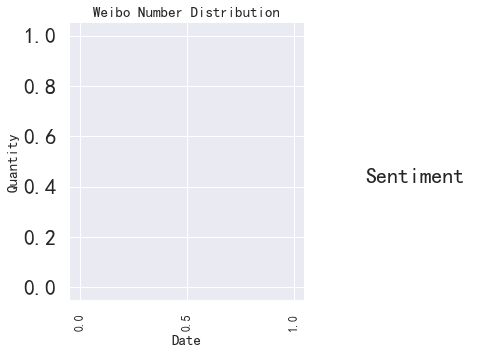

In [13]:
#Effect of time on label distribution
sns.relplot(x="date", y="ID", kind="line", hue='Sentiment',palette=["b", "r",'g'],data=date_influence)
plt.xticks(rotation=90,fontsize=12)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Quantity',fontsize=15)
plt.title('Weibo Number Distribution',fontsize=15)
plt.show()


C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\internals\managers.py:226: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1786: RuntimeWarning: divide by zero encountered in not_equal
  mask = ids != -1
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1790: RuntimeWarning: divide by zero encountered in invert
  for blk in data.blocks
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1790: RuntimeWarning: divide by zero encountered in bitwise_and
  for blk in data.blocks
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\indexes\base.py:5015: RuntimeWarning: divide by zero encountered in equal
  mask = indexer == -1
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\lib\function_base.py:4400: RuntimeWarning: divide by zero encountered in less
  inside_bounds = (obj < N) & (obj >= -N)
C:\Users\ruiwa\anaconda3\lib\site-pack

C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: divide by zero encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\transforms.py:1938: RuntimeWarning: divide by zero encountered in deg2rad
  return self.rotate(np.deg2rad(degrees))
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\transforms.py:1922: RuntimeWarning: divide by zero encountered in cos
  a = np.cos(theta)
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\transforms.py:1923: RuntimeWarning: divide by zero encountered in sin
  b = np.sin(theta)
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2434: RuntimeWarning: divide by zero encountered in isfinite
  finite_dl = [d for d in dl if np.isfinite(d).all()]
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\

C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\text.py:362: RuntimeWarning: divide by zero encountered in double_scalars
  width = xmax - xmin
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\text.py:363: RuntimeWarning: divide by zero encountered in double_scalars
  height = ymax - ymin
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\text.py:375: RuntimeWarning: divide by zero encountered in double_scalars
  offsetx = (xmin + xmax) / 2
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\text.py:415: RuntimeWarning: divide by zero encountered in double_scalars
  xmin -= offsetx
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\text.py:416: RuntimeWarning: divide by zero encountered in double_scalars
  ymin -= offsety
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\transforms.py:786: RuntimeWarning: divide by zero encountered in double_scalars
  return Bbox.from_extents(x0, y0, x0 + width, y0 + height)
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\t

C:\Users\ruiwa\anaconda3\lib\site-packages\seaborn\axisgrid.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  legend_width = figlegend.get_window_extent().width / self.fig.dpi
C:\Users\ruiwa\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: RuntimeWarning: divide by zero encountered in double_scalars
  space_needed = legend_width / (fig_width + legend_width)
C:\Users\ruiwa\anaconda3\lib\site-packages\seaborn\axisgrid.py:120: RuntimeWarning: divide by zero encountered in double_scalars
  self._space_needed = margin + space_needed
C:\Users\ruiwa\anaconda3\lib\site-packages\seaborn\axisgrid.py:121: RuntimeWarning: divide by zero encountered in double_scalars
  right = 1 - self._space_needed
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\gridspec.py:111: RuntimeWarning: divide by zero encountered in double_scalars
  tot_width = right - left
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\gridspec.py:112: RuntimeWarning: divide by zero encountered in dou

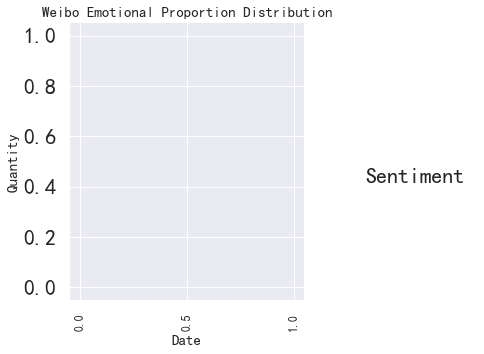

In [14]:
ate_influence = date_influence.merge(train_df.groupby('date',as_index=False)['Sentiment'].count(),how='left',on='date')

date_influence['weibo_rate'] = date_influence['ID']/date_influence['Sentiment']

sns.relplot(x="date", y="weibo_rate", kind="line", hue='Sentiment',palette=["b", "r",'g'],data=date_influence)
plt.xticks(rotation=90,fontsize=12)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Quantity',fontsize=15)
plt.title('Weibo Emotional Proportion Distribution',fontsize=15)
plt.show()


In [35]:
#Observation data rules (time series analysis)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.kdeplot(train_df.loc[train_df['Sentiment'] == '0', 'date'], ax=ax[0], label='sent(0)')
sns.kdeplot(train_df.loc[train_df['Sentiment'] == '1', 'date'], ax=ax[0], label='sent(1)')
sns.kdeplot(train_df.loc[train_df['Sentiment'] == '-1', 'date'], ax=ax[0], label='sent(-1)')
train_df.loc[train_df['Sentiment'] == '0', 'date'].hist(ax=ax[1])
train_df.loc[train_df['Sentiment'] == '1', 'date'].hist(ax=ax[1])
train_df.loc[train_df['Sentiment'] == '-1', 'date'].hist(ax=ax[1])
ax[1].legend(['sent(0)', 'sent(1)','sent(-1)'])

C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\figure.py:348: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(figsize).all():
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\figure.py:348: RuntimeWarning: invalid value encountered in isfinite
  if not np.isfinite(figsize).all():
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\gridspec.py:136: RuntimeWarning: divide by zero encountered in subtract
  fig_tops, fig_bottoms = (top - cell_hs).reshape((-1, 2)).T
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\gridspec.py:136: RuntimeWarning: invalid value encountered in subtract
  fig_tops, fig_bottoms = (top - cell_hs).reshape((-1, 2)).T
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\gridspec.py:137: RuntimeWarning: divide by zero encountered in add
  fig_lefts, fig_rights = (left + cell_ws).reshape((-1, 2)).T
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\gridspec.py:137: RuntimeWarning: invalid value encountered in add
  f

KeyError: 'date'

C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\transforms.py:2832: RuntimeWarning: divide by zero encountered in double_scalars
  elif vmax - vmin <= maxabsvalue * tiny:
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\transforms.py:2832: RuntimeWarning: invalid value encountered in double_scalars
  elif vmax - vmin <= maxabsvalue * tiny:
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\transforms.py:417: RuntimeWarning: divide by zero encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\transforms.py:417: RuntimeWarning: invalid value encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\axis.py:2182: RuntimeWarning: divide by zero encountered in double_scalars
  length = ((ends[1][0] - ends[0][0]) / self.axes.figure.dpi) * 72
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\axis.py:2182: RuntimeWarning: invalid value encountered in

C:\Users\ruiwa\anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:195: RuntimeWarning: divide by zero encountered in greater
  return rgbaArr[:,:3].dot((.299, .587, .114)) > .5
C:\Users\ruiwa\anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:195: RuntimeWarning: invalid value encountered in greater
  return rgbaArr[:,:3].dot((.299, .587, .114)) > .5
C:\Users\ruiwa\anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:184: RuntimeWarning: divide by zero encountered in equal
  if ticksLight.size and (ticksLight == ticksLight[0]).all():
C:\Users\ruiwa\anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:184: RuntimeWarning: invalid value encountered in equal
  if ticksLight.size and (ticksLight == ticksLight[0]).all():
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\transforms.py:411: RuntimeWarning: divide by zero encountered in subtract
  return points[1] - points[0]
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\transforms.py:411: Ru

C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\axis.py:2029: RuntimeWarning: divide by zero encountered in double_scalars
  (x, bottom - self.labelpad * self.figure.dpi / 72)
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\axis.py:2029: RuntimeWarning: invalid value encountered in double_scalars
  (x, bottom - self.labelpad * self.figure.dpi / 72)
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\axis.py:2059: RuntimeWarning: divide by zero encountered in double_scalars
  (x, bottom - self.OFFSETTEXTPAD * self.figure.dpi / 72)
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\axis.py:2059: RuntimeWarning: invalid value encountered in double_scalars
  (x, bottom - self.OFFSETTEXTPAD * self.figure.dpi / 72)
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\text.py:678: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(posx) or not np.isfinite(posy):
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\text.py:678: RuntimeWarning: invali

ValueError: cannot convert float NaN to integer

<Figure size 1152x576 with 2 Axes>